# PyBer

### Dependencies and data

In [1]:
# Dependencies
import os
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [40]:
# Plot settings
mpl.style.use('fivethirtyeight')
mpl.rcParams['savefig.bbox'] = 'tight'

In [2]:
# City data
city_path = os.path.join('data', 'city_data.csv') # city data path
city_df = pd.read_csv(city_path)
city_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB
None


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban


In [3]:
# Ride data
ride_path = os.path.join('data', 'ride_data.csv') # ride data path
ride_df = pd.read_csv(ride_path, parse_dates=['date'])
ride_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   city     2375 non-null   object        
 1   date     2375 non-null   datetime64[ns]
 2   fare     2375 non-null   float64       
 3   ride_id  2375 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 74.3+ KB
None


,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003


### Merge data

In [5]:
# Check for missing vals in both dfs
print(city_df.isnull().sum())
ride_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64
city       0
date       0
fare       0
ride_id    0
dtype: int64


In [6]:
# Check unique vals for each col
print(city_df.nunique())
ride_df.nunique()

city            120
driver_count     52
type              3
dtype: int64


city        120
date       2375
fare       1841
ride_id    2375
dtype: int64

In [7]:
# Merge data
df = pd.merge(ride_df, city_df, on='city', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   city          2375 non-null   object        
 1   date          2375 non-null   datetime64[ns]
 2   fare          2375 non-null   float64       
 3   ride_id       2375 non-null   int64         
 4   driver_count  2375 non-null   int64         
 5   type          2375 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 129.9+ KB


In [8]:
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Ride fare bubble chart with Pandas

In [16]:
# Fares and rides by city
df_by_city = df.groupby(['city', 'type'], as_index=False) \
               .agg({'ride_id': 'count', 'fare': 'mean', 'driver_count': 'max'}) \
               .sort_values('ride_id')
df_by_city.columns = ['City', 'City Type', 'Total Rides', 'Average Fare ($)', 'Total Drivers']
df_by_city['Total Drivers x5'] = df_by_city['Total Drivers'] * 5

# Assign a color to each city type
type_colors = {'Rural': 'lightcoral', 'Suburban': 'limegreen', 'Urban': 'skyblue'}
df_by_city['Color'] = df_by_city['City Type'].map(type_colors)
df_by_city.head(3)

,City,City Type,Total Rides,Average Fare ($),Total Drivers,Total Drivers x5,Color
17,Garzaport,Rural,3,24.123333,7,35,lightcoral
98,South Saramouth,Rural,4,36.160000,7,35,lightcoral
57,Newtonview,Rural,4,36.745000,1,5,lightcoral


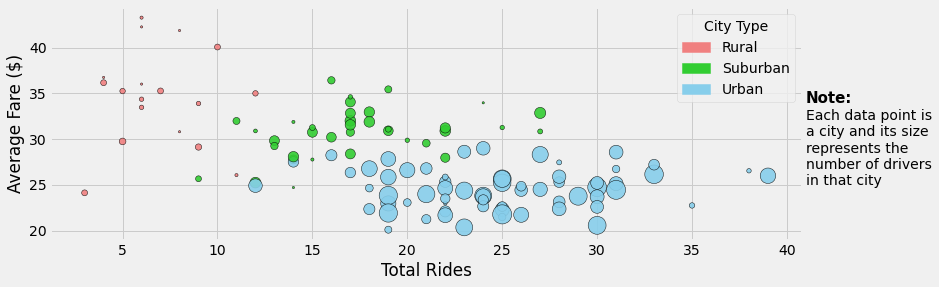

In [36]:
# Bubble chart
bubble = df_by_city.plot(x='Total Rides', y='Average Fare ($)', s='Total Drivers x5', c='Color',
                         edgecolor='black', alpha=0.9, kind='scatter', figsize=(12, 4))
plt.legend(title='City Type',
           handles=[mpl.patches.Patch(color=col, label=lab) for lab, col in type_colors.items()])

# Annotation
fontdict = dict(size=15, weight='bold')
plt.text(41, 34, 'Note:', fontdict=fontdict)
plt.text(41, 25, (
    'Each data point is\n'
    'a city and its size\n'
    'represents the\n'
    'number of drivers\n'
    'in that city'))

plt.show()

In [52]:
# Save bubble plot
bubble.get_figure().savefig('analysis/pdbubble.png')

### Ride fare bubble chart with Matplotlib

In [42]:
# Split data by city type
rural_df = df_by_city[df_by_city['City Type'] == 'Rural'].copy()
suburban_df = df_by_city[df_by_city['City Type'] == 'Suburban'].copy()
urban_df = df_by_city[df_by_city['City Type'] == 'Urban'].copy()
rural_df.shape, suburban_df.shape, urban_df.shape

((18, 7), (36, 7), (66, 7))

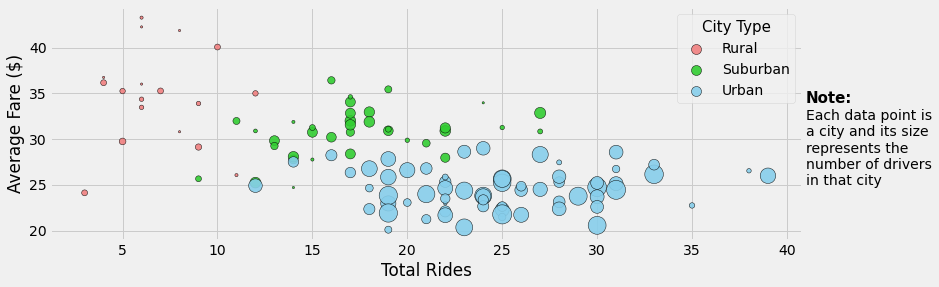

In [50]:
# Bubble chart
bubble2 = plt.figure(figsize=(12, 4))
plt.scatter(data=rural_df, x='Total Rides', y='Average Fare ($)', s='Total Drivers x5', 
            c='lightcoral', edgecolor='black', alpha=0.9, label='Rural')
plt.scatter(data=suburban_df, x='Total Rides', y='Average Fare ($)', s='Total Drivers x5', 
            c='limegreen', edgecolor='black', alpha=0.9, label='Suburban')
plt.scatter(data=urban_df, x='Total Rides', y='Average Fare ($)', s='Total Drivers x5', 
            c='skyblue', edgecolor='black', alpha=0.9, label='Urban')

# Annotation
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Rides')
plt.text(41, 34, 'Note:', fontdict=fontdict)
plt.text(41, 25, (
    'Each data point is\n'
    'a city and its size\n'
    'represents the\n'
    'number of drivers\n'
    'in that city'))

# Legend
lgnd = plt.legend(title='City Type', mode='Expanded', scatterpoints=1)
lgnd.get_title().set_fontsize(15)
for i in range(3):
    lgnd.legendHandles[i]._sizes = [100]
plt.show()

In [51]:
bubble2.savefig('analysis/pltbubble.png')

### City type box plots

In [14]:
by_city

,City,Total Rides (per city),Average Fare ($),Total Drivers (per city),City Type,Total Drivers / 5,Color
0,Garzaport,3,24.123333,7,Rural,35,lightcoral
3,South Saramouth,4,36.160000,7,Rural,35,lightcoral
7,Newtonview,4,36.745000,1,Rural,5,lightcoral
11,Randallchester,5,29.742000,9,Rural,45,lightcoral
16,Penaborough,5,35.246000,6,Rural,30,lightcoral
...,...,...,...,...,...,...,...
2197,Liumouth,33,26.150000,69,Urban,345,skyblue
2230,Port Frank,33,27.201515,23,Urban,115,skyblue
2263,North Jason,35,22.743714,6,Urban,30,skyblue
2298,South Karenland,38,26.535526,4,Urban,20,skyblue


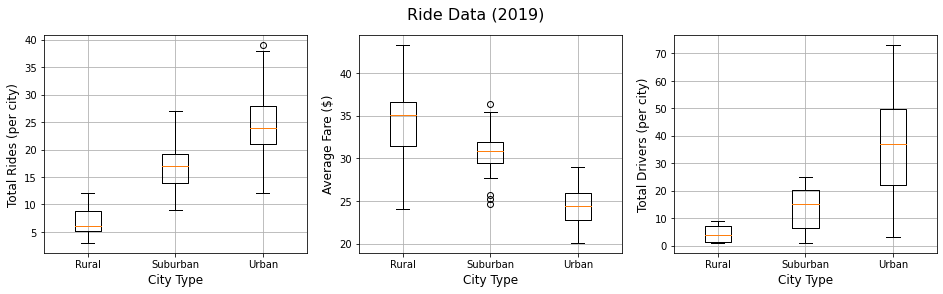

In [15]:
# Columns to plot and unique city types
box_cols = ['Total Rides (per city)', 'Average Fare ($)', 'Total Drivers (per city)']
city_types = by_city['City Type'].unique()

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Ride Data (2019)', fontsize=16)
for i in range(3):
    by_types = [by_city.loc[by_city['City Type'] == ctype, box_cols[i]] for ctype in city_types]
    ax[i].boxplot(by_types, labels=city_types)
    ax[i].set_ylabel(box_cols[i], fontsize=12)
    ax[i].set_xlabel('City Type', fontsize=12)
    ax[i].grid()
plt.show()

In [16]:
fig.savefig('analysis/boxes.png')

### City type pie charts

In [17]:
# Fares and rides by city type
by_city_type = df.groupby('type', as_index=False).agg({'ride_id': 'count', 'fare': 'sum', 'driver_count': 'sum'}).sort_values('ride_id')
by_city_type.columns = ['City Type', 'Total Rides', 'Total Fare', 'Total Drivers']
by_city_type['Color'] = by_city_type['City Type'].map(type_colors)
by_city_type

,City Type,Total Rides,Total Fare,Total Drivers,Color
0,Rural,125,4327.93,537,lightcoral
1,Suburban,625,19356.33,8570,limegreen
2,Urban,1625,39854.38,59602,skyblue


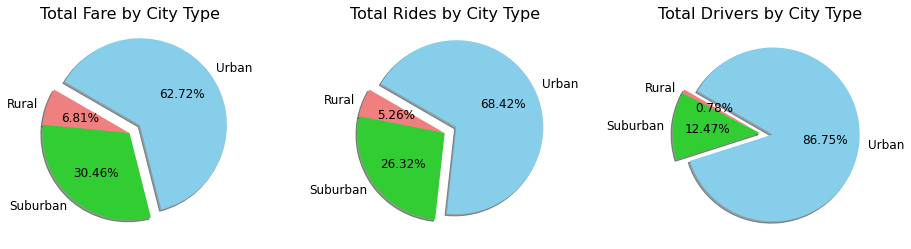

In [18]:
# Pie charts
mpl.rcParams['font.size'] = 12
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0].pie(x=by_city_type['Total Fare'], labels=by_city_type['City Type'], colors=by_city_type['Color'],
          startangle=150, autopct='%.2f%%', explode=[0, 0, 0.15], shadow=True)
ax[0].set_title('Total Fare by City Type', fontsize=16)
ax[1].pie(x=by_city_type['Total Rides'], labels=by_city_type['City Type'], colors=by_city_type['Color'],
          startangle=150, autopct='%.2f%%', explode=[0, 0, 0.15], shadow=True)
ax[1].set_title('Total Rides by City Type', fontsize=16)
ax[2].pie(x=by_city_type['Total Drivers'], labels=by_city_type['City Type'], colors=by_city_type['Color'],
          startangle=150, autopct='%.2f%%', explode=[0, 0, 0.15], shadow=True)
ax[2].set_title('Total Drivers by City Type', fontsize=16)
plt.show()

In [19]:
fig.savefig('analysis/pies.png')

### City type summary

In [20]:
# Add total fare feature
fare_by_city = df.groupby('city', as_index=False).fare.sum()
fare_by_city.columns = ['City', 'Total Fare ($)']
by_city = pd.merge(by_city, fare_by_city, on='City', how='left')
by_city.head(2)

,City,Total Rides (per city),Average Fare ($),Total Drivers (per city),City Type,Total Drivers / 5,Color,Total Fare ($)
0,Garzaport,3,24.123333,7,Rural,35,lightcoral,72.37
1,South Saramouth,4,36.160000,7,Rural,35,lightcoral,144.64


In [28]:
# Totals by city type
by_city_type = by_city.groupby('City Type')[['Total Rides (per city)', 'Total Drivers (per city)', 'Total Fare ($)']].sum()
by_city_type.columns = ['Total Rides', 'Total Drivers', 'Total Fares ($)']

# Add averages by city type
by_city_type['Average Fare Per Ride ($)'] = by_city_type['Total Fares ($)'] / by_city_type['Total Rides']
by_city_type['Average Fare Per Driver ($)'] = by_city_type['Total Fares ($)'] / by_city_type['Total Drivers']
by_city_type[['Average Rides (per city)', 'Average Drivers (per city)']] = by_city.groupby('City Type')[['Total Rides (per city)', 'Total Drivers (per city)']].mean()
by_city_type

,Total Rides,Total Drivers,Total Fares ($),Average Fare Per Ride ($),Average Fare Per Driver ($),Average Rides (per city),Average Drivers (per city)
City Type,,,,,,,
Rural,125,78,4327.93,34.623440,55.486282,6.944444,4.333333
Suburban,625,490,19356.33,30.970128,39.502714,17.361111,13.611111
Urban,1625,2405,39854.38,24.525772,16.571468,24.621212,36.439394


In [29]:
# Format summary
by_city_type.index.name = None
for col in by_city_type.columns:
    if 'per city' in col:
        by_city_type[col] = by_city_type[col].round(0).astype(int)
    elif '$' in col:
        by_city_type[col] = by_city_type[col].map('$ {:,.2f}'.format)
    else:
        by_city_type[col] = by_city_type[col].map('{:,}'.format)
        
by_city_type

,Total Rides,Total Drivers,Total Fares ($),Average Fare Per Ride ($),Average Fare Per Driver ($),Average Rides (per city),Average Drivers (per city)
Rural,125,78,"$ 4,327.93",$ 34.62,$ 55.49,7,4
Suburban,625,490,"$ 19,356.33",$ 30.97,$ 39.50,17,14
Urban,"1,625","2,405","$ 39,854.38",$ 24.53,$ 16.57,25,36


### Weekly total fares by city type

In [35]:
# Create a pivot table with the date as the index, city type as the columns, and fare as the values
weekly_fares = df.pivot(index='date', columns='type', values='fare').fillna(0)
weekly_fares

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,0.0,0.00,37.91
2019-01-01 00:46:46,0.0,47.74,0.00
2019-01-01 02:07:24,0.0,24.07,0.00
2019-01-01 03:46:50,0.0,0.00,7.57
2019-01-01 05:23:21,0.0,0.00,10.75
...,...,...,...
2019-05-08 04:20:00,0.0,0.00,21.99
2019-05-08 04:39:49,0.0,0.00,18.45
2019-05-08 07:29:01,0.0,0.00,18.55


In [43]:
# Downsample to weekly frequency
weekly_fares = weekly_fares.resample('w').sum()
weekly_fares = weekly_fares.iloc[:-1]
weekly_fares.index.name = None
weekly_fares.columns.name = None
weekly_fares

,Rural,Suburban,Urban
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20
2019-03-10,303.94,925.27,2470.93


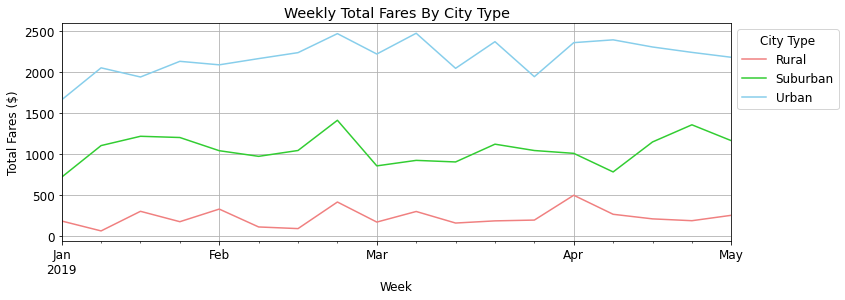

In [54]:
# Line plots
lineplot = weekly_fares.plot(title='Weekly Total Fares By City Type', figsize=(12, 4),
                             color=['lightcoral', 'limegreen', 'skyblue'], grid=True)
plt.ylabel('Total Fares ($)', fontsize=12)
plt.xlabel('Week', fontsize=12)
plt.legend(title='City Type', bbox_to_anchor=(1, 1))
plt.show()

In [55]:
lineplot.get_figure().savefig('analysis/lines.png')